**UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL  
FACULDADE DE CIENCIAS ECONOMICAS  
DEPARTAMENTO DE ECONOMIA E RELACOES INTERNACIONAIS  
DISCIPLINA: ECO02018 - TOPICOS ESPECIAIS EM ECONOMETRIA  
ALUNA: TAINAN DE BACCO FREITAS BOFF**  

# Analise dos determinantes do faturamento real medio da industria de transformacao

Este estudo apresenta uma breve analise sobre a relacao existente entre o faturamento real medio da industria de transformacao e as seguintes variaveis:
1. Utilizacao da capacidade instalada na industria de transformacao;  
2. Produtividade do trabalho na industria de transformacao, calculada como a diferenca entre as variacoes do indice de producao fisica e as variacoes do indice de horas trabalhadas;
3. Custo do trabalho na industria de transformacao, calculado como a razao entre o indice de massa salarial real e o indice de horas trabalhadas.  
Todas as variaveis sao obtidas em formato de indice atraves do Sistema Gerenciador de Series Temporais do Banco Central. A analise considera o periodo de 121 meses abrangidos entre janeiro de 2006 e janeiro de 2016.

In [181]:
# Importacao de pacotes
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa as smt
import numpy as np

## Importacao dos dados

In [89]:
# Faturamento medio da industria de transformacao
faturamento = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.24346/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])
faturamento = faturamento.loc['2006-01-01':'2016-01-01']

# Utilizacao da capacidade instalada
utilizacao = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.24351/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])
utilizacao = utilizacao.loc['2006-01-01':'2016-01-01']

# Produtividade: calculada como a diferenca entre variacoes da producao fisica e variacoes do numero de horas trabalhadas
producao = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.21862/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])
producao = producao.loc['2006-01-01':'2016-01-01']
dlogproducao = np.log(producao).diff()

horas = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.24348/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])
horas = horas.loc['2006-01-01':'2016-01-01']
dloghoras = np.log(horas).diff()

produtividade = dlogproducao - dloghoras

# Custo do trabalho: calculado como a razao entre o indice de massa salarial real e o indice de horas trabalhadas na industria de transformacao (ambos com base em 2006)
salarios = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.24349/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])
salarios = salarios.loc['2006-01-01':'2016-01-01']

custo = salarios/horas

## Analise exploratoria dos dados

Inicialmente sera realizada a analise exploratoria dos dados. Por tratarem-se de series temporais economicas, e indispensavel a realizacao de inspecao grafica e teste de raiz unitaria a fim de verificar nao-estacionariedades, tais como tendencia e sazonalidade nas series. Alem disso, o calculo de estatisticas descritivas - tais como media, desvio padrao, maximo, minimo, etc. - permite uma melhor compreensao sobre a distribuicao dos dados e a eventual identificacao de observacoes aberrantes.

#### Faturamento

In [88]:
faturamento.head()

,valor
data,
2006-01-01,87.9
2006-01-02,86.2
2006-01-03,102.7
2006-01-04,91.4
2006-01-05,102.0


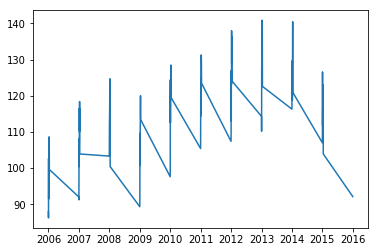

In [194]:
plt_faturamento = plt.plot(faturamento)
plt.savefig("imagens/faturamento.png")
plt.show()

#### Utilizacao da capacidade instalada

In [87]:
utilizacao.head()

,valor
data,
2006-01-01,79.5
2006-01-02,80.3
2006-01-03,81.3
2006-01-04,80.1
2006-01-05,82.8


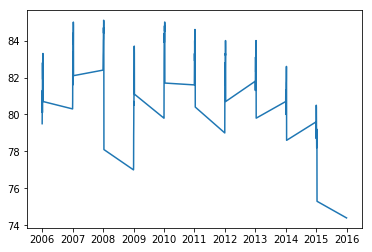

In [195]:
plt_utlizacao = plt.plot(utilizacao)
plt.savefig("imagens/utilizacao.png")
plt.show()

#### Produtividade do trabalho

In [66]:
produtividade.head()

,valor
data,
2006-01-01,NaN
2006-01-02,-0.042144
2006-01-03,0.051832
2006-01-04,-0.024360
2006-01-05,0.026741


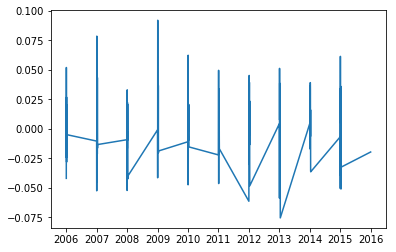

In [196]:
plt_produtividade = plt.plot(produtividade)
plt.savefig("imagens/produtividade.png")
plt.show()

#### Custo do trabalho

In [81]:
custo.head()

,valor
data,
2006-01-01,1.032751
2006-01-02,1.041304
2006-01-03,0.957299
2006-01-04,1.010482
2006-01-05,0.946911


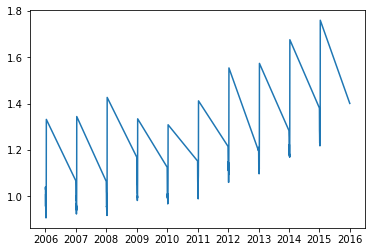

In [197]:
plt_custo = plt.plot(custo)
plt.savefig("imagens/custo.png")
plt.show()

Com excecao da serie de produtividade, todas as demais apresentam certa tendencia. O faturamento apresentou tendencia de alta ate o ano de 2013, quando comecou a cair. A utilizacao da capacidade instalada mantinha-se em um patamar relativamente constante ate este mesmo ano, quando comecou a cair. Por fim, os custos do trabalho sao crescentes ao longo de todo o periodo, o que provavelmente e um resultado da politica de valorizacao real do salario minimo.

### Estatisticas descritivas

As estatisticas descritivas apresentadas para cada uma das series em em nivel sao: numero de observacoes, media, desvio-padrao, minimo, segundo, terceiro e quarto quintis e o valor maximo.

In [228]:
# Unifica os dados
dados = reduce(lambda left,right: pd.merge(left,right, on = 'data'), [faturamento, utilizacao, produtividade, custo])
dados.columns = ['faturamento', 'utilizacao', 'produtividade', 'custo']

# Estatisticas descritivas
est_desc_dados = dados.describe()
print(est_desc_dados)

# Salva a tabela de estatisticas descritivas em arquivo .csv
est_desc_dados.to_csv('tabelas/est_desc_dados.csv')

       faturamento  utilizacao  produtividade       custo
count   121.000000  121.000000     120.000000  121.000000
mean    116.180165   81.914050       0.000004    1.122322
std      12.412800    2.123256       0.031825    0.159942
min      86.200000   74.400000      -0.075673    0.907563
25%     108.100000   80.700000      -0.018458    1.002860
50%     116.600000   82.300000      -0.005425    1.082374
75%     125.000000   83.400000       0.024098    1.202912
max     140.900000   85.100000       0.091902    1.760300


## Teste de Dickey-Fuller aumentado para raiz unitaria

O teste de Dickey-Fuller aumentado tem como hipotese nula a presenca de raiz unitaria.

#### Faturamento

In [99]:
adf_faturamento = sm.tsa.stattools.adfuller(faturamento.valor)
print("Estatistica de teste:", adf_faturamento[0])
print("Valores criticos para a estatistica de teste:", adf_faturamento[4])
print("P-valor:", adf_faturamento[1])

Estatistica de teste: -1.9317809558990315
Valores criticos para a estatistica de teste: {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}
P-valor: 0.31726116843685265


A estatistica de teste indica que ha raiz unitaria na serie de faturamento da industria de transformacao, ou seja, ha evidencias de que a serie e nao estacionaria ao nivel de significancia de 10%.

#### Utilizacao da capacidade instalada

In [42]:
adf_utilizacao = sm.tsa.stattools.adfuller(utilizacao.valor)
print("Estatistica de teste:", adf_utilizacao[0])
print("Valores criticos para a estatistica de teste:", adf_utilizacao[4])
print("P-valor:", adf_utilizacao[1])

Estatistica de teste: -1.0773597246997877
Valores criticos para a estatistica de teste: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
P-valor: 0.7240156302884798


A estatistica de teste indica que ha raiz unitaria na serie de utilizacao da capacidade instalada na industria de transformacao, ou seja, ha evidencias de que a serie e nao estacionaria ao nivel de significancia de 10%.

#### Produtividade do trabalho

In [254]:
adf_produtividade = sm.tsa.stattools.adfuller(produtividade.valor.dropna())
print("Estatistica de teste:", adf_produtividade[0])
print("Valores criticos para a estatistica de teste:", adf_produtividade[4])
print("P-valor:", adf_produtividade[1])

Estatistica de teste: -2.8714992557317442
Valores criticos para a estatistica de teste: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
P-valor: 0.04876404580605681


As series de producao fisica e horas trabalhadas na industria de transformacao, utilizadas para o calculo da produtividade, ja haviam sido previamente diferenciadas. O teste ADF confirma que nao ha indicios de nao estacionariedade na serie da produtividade ao nivel de significancia de 5%.

#### Custo do trabalho

In [215]:
adf_custo = sm.tsa.stattools.adfuller(custo.valor)
print("Estatistica de teste:", adf_custo[0])
print("Valores criticos para a estatistica de teste:", adf_custo[4])
print("P-valor:", adf_custo[1])

Estatistica de teste: 0.9574961674559265
Valores criticos para a estatistica de teste: {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}
P-valor: 0.993796610508264


A estatistica de teste indica que ha raiz unitaria na serie de custo do trabalho, ou seja, ha evidencias de que a serie e nao estacionaria ao nivel de significancia de 10%.

## Calculo das diferencas logaritmicas para obtencao de series estacionarias

#### Faturamento

In [100]:
dlogfaturamento = np.log(faturamento).diff()
dlogfaturamento.head()

,valor
data,
2006-01-01,NaN
2006-01-02,-0.019530
2006-01-03,0.175142
2006-01-04,-0.116567
2006-01-05,0.109727


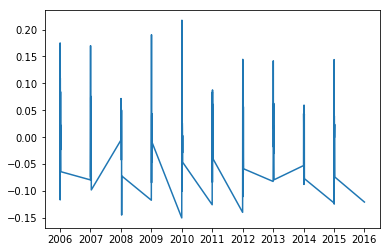

In [220]:
plt_dlogfaturamento = plt.plot(dlogfaturamento)
plt.savefig("imagens/dlogfaturamento.png")
plt.show()

#### Utilizacao

In [102]:
dlogutilizacao = np.log(utilizacao).diff()
dlogutilizacao.head()

,valor
data,
2006-01-01,NaN
2006-01-02,0.010013
2006-01-03,0.012376
2006-01-04,-0.014870
2006-01-05,0.033152


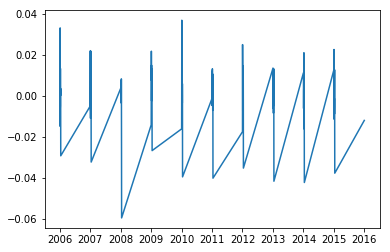

In [221]:
plt_dlogutilizacao = plt.plot(dlogutilizacao)
plt.savefig("imagens/dlogutilizacao.png")
plt.show()

#### Custo do trabalho

In [223]:
dlogcusto = np.log(custo).diff()
dlogcusto.head()

,valor
data,
2006-01-01,NaN
2006-01-02,0.008248
2006-01-03,-0.084114
2006-01-04,0.054067
2006-01-05,-0.064978


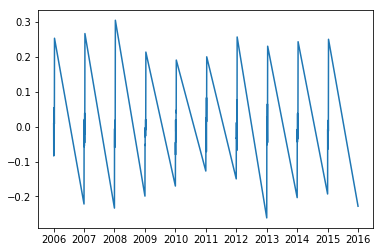

In [224]:
plt_dlogcusto = plt.plot(dlogcusto)
plt.savefig("imagens/dlogcusto.png")
plt.show()

A analise grafica das series diferenciadas nao sugere a necessidade de realizar uma nova diferenciacao ou teste de raiz unitaria. Todas apresentam media constante ao redor de zero. Abaixo apresentam-se estatisticas descritivas para estas series.

In [229]:
# Unificacao das series diferenciadas
dlogdados = reduce(lambda left,right: pd.merge(left,right, on = 'data'), [dlogfaturamento, dlogutilizacao, produtividade, dlogcusto])
dlogdados.columns = ['dlogfaturamento', 'dlogutilizacao', 'dlogprodutividade', 'dlogcusto']

# Estatisticas descritivas
est_desc_dlogdados = dlogdados.describe()
print(est_desc_dlogdados)

# Salva a tabela em .csv
est_desc_dlogdados.to_csv('tabelas/est_desc_dlogdados.csv')

       dlogfaturamento  dlogutilizacao  dlogprodutividade   dlogcusto
count       120.000000      120.000000         120.000000  120.000000
mean          0.000389       -0.000553           0.000004    0.002544
std           0.072859        0.015646           0.031825    0.100922
min          -0.150044       -0.059645          -0.075673   -0.261464
25%          -0.047620       -0.007122          -0.018458   -0.044019
50%           0.004707        0.001209          -0.005425   -0.006581
75%           0.039080        0.009535           0.024098    0.025466
max           0.217332        0.036905           0.091902    0.304344


# Regressao linear e diagnostico do modelo

A modelagem do faturamento mensal das industrias de transformacao e feita atraves de uma regressao multipla. Utilizam-se tres variaveis explicativas: a utilizacao da capacidade instalada, a produtividade do trabalho e o custo do trabalho na industria de transformacao. Espera-se que o faturamento esteja positivamente relacionado as duas primeiras variaveis.  
A maior utilizacao da capacidade instalada esta relacionada a uma maior producao, o que implicara em aumento do faturamento desde que essa producao seja vendida. A producao costuma ser puxada pela demanda e a industria trabalha com capacidade ociosa quando ha perspectiva de acumulacao de estoques. Por isso, espera-se que um aumento da utilizacao da capacidade instalada venha acompanhado de um aumento do faturamento.     
A produtividade do trabalho refere-se a quantidade de bens que cada hora de trabalho e capaz de produzir. O aumento produtividade levara a um aumento do faturamente (novamente, desde que a produca nao seja estocada).  
Por fim, a relacao entre o faturamento e o aumento do salario pago para cada hora trabalhada sera um indicativo do que ocorre com a rentabilidade da industria de transformacao. Se o faturamento aumentar juntamente com a elevacao do salario, que e um custo para a empresa, isso indica uma protecao as margens de lucro. Por outro lado, um coeficiente negativo indica a reducao das margens da industria, o que tambem e um indicio de um mercado mais concorrencial.

In [251]:
regressao = smf.ols(formula = 'dlogfaturamento ~ dlogutilizacao + dlogprodutividade + dlogcusto - 1', data = dlogdados,  missing = 'drop').fit()
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dlogfaturamento   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     72.68
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.31e-26
Time:                        23:09:13   Log-Likelihood:                 207.66
No. Observations:                 120   AIC:                            -409.3
Df Residuals:                     117   BIC:                            -401.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
dlogutilizacao        2.5588      0.404      6.331      0.000       1.758       3.359
dlogprodutividade     1.1365      0.157      7.223      0.000       0.825       1.448
dlogcusto             0.2242      0.053      4.238      0.000       0.119       0.329
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   2.687
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.224
Skew:                          -0.029   Prob(JB):                        0.894
Kurtosis:                       2.797   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Em uma primeira analise, todos os coeficientes mostraram-se significativos aos nivel de 10%. Porem faremos a analise dos resultados apos o dignostico da regressao.

## Diagnostico da regressao

O modelo classico de regressao linear baseia-se em uma serie de hipoteses sobre os dados:
1. Linearidade dos parametros;
2. Homocedasticidade;
3. Ausencia de autocorrelacao serial nos residuos;
4. Normalidade dos residuos;

Sob estas hipoteses, o estimador de minimos quadrados ordinarios (MQO) e o melhor estimador linear nao viesado. Quando alguma das hipoteses e violada, o estimador perde algumas de suas caracteristicas desejaveis.  

A primeira analise sera a visualizacao do grafico dos residuos contra os valores ajustados, o qual devera mostrar-se uma nuvem de pontos aleatorios, sem qualquer tendencia. A presenca de algum padrao de comportamento nos pontos seria um indicativo de que a especificao linear nao estaria adequada aos dados.

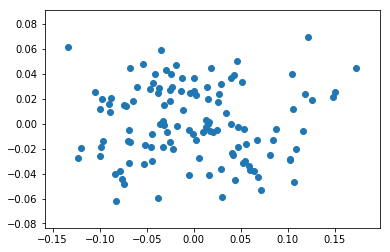

In [231]:
plt_res_fitt = plt.scatter(regressao.fittedvalues,regressao.resid)
plt.savefig("imagens/res_fitt.png")
plt.show()

A seguir, testaremos as hipoteses de homocedasticidade e ausencia de autocorrelacao serial dos residuos. Em ambos os casos a violacao da hipotese tem duas implicacoes:
1. O estimador de MQO, apesar de permanecer nao viesado, deixa de ser eficiente;
2. Os erros padrao do estimador contem erros, o que torna a inferencia invalida.
Neste caso, e preciso utilizar um metodo de estimacao robusto, tal como minimos quadrados generalizados.

### Teste de heterocedasticidade

A hipotese de homocedasticidade significa que a variancia do erro e constante condicionalmente as variaveis explicativas. Quando esta hipotese falha, o estimador permanece nao viesado, mas perde sua eficiencia. Alem disso, os erros padrao dos estimadores sao viesados e, portanto, a inferencia perde sua validade. A seguir, testamos esta hipotese atraves do teste de Breusch-Pagan e de inspecao grafica do comportamento dos residuos quadrados contra os valores ajustados e as variaveis explicativas.


#### Teste de Breusch-Pagan

In [173]:
bpteste = sm.stats.diagnostic.het_breuschpagan(regressao.resid, regressao.model.exog)
print('Estatistica de teste:', bpteste[0]) 
print('P-valor:', bpteste[1])  
print('Estatistica F:', bpteste[2])  
print('P-valor da estatistica F:', bpteste[3])

Estatistica de teste: 3.6343979958930683
P-valor: 0.1624802215844403
Estatistica F: 1.2180706273906188
P-valor da estatistica F: 0.30632579917834507


O teste de Breusch-Pagan trabalha com a hipotese nula de homocedasticidade. Os resultados do teste nao permitem rejeitar esta hipotese ao nivel de significancia de 10%.

#### Grafico dos residuos quadrados contra valores ajustados e variaveis explicativas

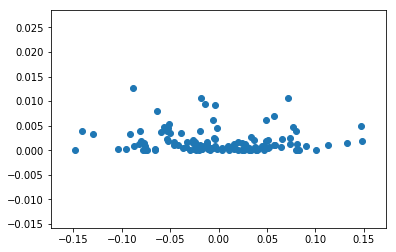

In [174]:
plt_res_fitt = plt.scatter(regressao.fittedvalues, regressao.resid**2)
plt.show()

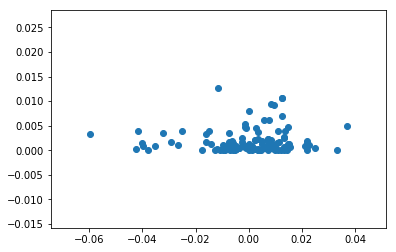

In [175]:
plt_res_util = plt.scatter(dlogutilizacao.dropna(), regressao.resid**2)
plt.show()

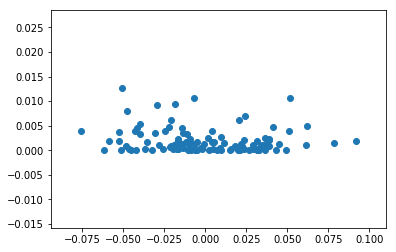

In [176]:
plt_res_prod = plt.scatter(produtividade.dropna(), regressao.resid**2)
plt.show()

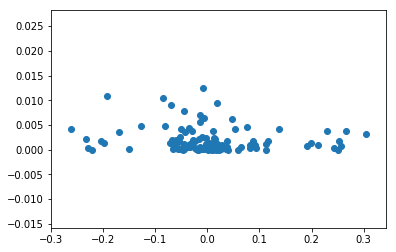

In [167]:
plt_res_custo = plt.scatter(dlogcusto.dropna(), regressao.resid**2)
plt.show()

Os graficos dos residuos quadrados contra os valores ajustados e variaveis explicativas nao apresentam sinais de heterocedasticidade: nao ha sinal claro de tendencia ou qualquer outro padrao de comportamento. Os pontos parecem estar distribuidos aleatoriamente. 

### Teste de autocorrelacao dos residuos

Se os residuos do modelo de regressao forem autocorrelacionados, o estimador de MQO deixa de ser eficiente e as inferencias deixam de ser confiaveis.

#### Teste de Durbin Watson

A hipotese nula do teste de Durbin Watson e a de que nao existe correlacao serial enre os residuos. A estatistica de teste assume valores entre 0 e 4. Quanto mais proxima de 0, maior a evidencia de que existe autocorrelacao positiva. Quanto mais proxima de 4, maior a evidencia de correlacao negativa. Na ausencia de correlacao serial, a estatistica do teste e igual a 2. 

In [177]:
dwteste = sm.stats.stattools.durbin_watson(regressao.resid)
print('A estatistica do teste e:', dwteste)

A estatistica do teste e: 2.6865357142668427


O resultado do teste sugere que existe um certo grau de autocorrelacao negativa nos residuos do modelo. Uma alternativa para reduzir essa estatistica seria testar a inclusao de outras variaveis no modelo.

### Teste de normalidade dos residuos

#### Teste de Jarque-Bera

In [238]:
jbteste = sm.stats.stattools.jarque_bera(regressao.resid)
print('A estatistica de teste e:',jbteste[0])
print('O p-valor e:',jbteste[1])
print('Assimetria:',jbteste[2])
print('Curtose:',jbteste[3])

A estatistica de teste e: 3.47388292983069
O p-valor e: 0.17605805772278527
Assimetria: 0.007392181767581455
Curtose: 2.1665985309822173


De acordo com o p-valor do teste, nao e possivel rejeitar a hipotese nula de normalidade. 

### Teste de cointegracao 

Ao modelar dados de series temporais com tendencia atraves de regressao, e preciso estar atento a possibilidade de ocorrencia de uma regressao espuria. Esse problema acontece quando as variaveis em analise, apesar de nao serem correlacionadas, geram um modelo com coeficientes significantes e elevado R2. Isso acontece porque ambas as variaveis apresentam correlacao com uma terceira variavel em comum. Quando as variaveis possuem uma tendencia estocastica em comum, diz-se que existe um equilibrio de longo prazo. Neste caso, a modelagem da relacao entre as variaveis pode ser feita utilizando o modelo vetorial de correcao de erros (VEC).  
A seguir, realiza-se o teste de cointegracao de Johansen a fim de verificar se os resultados do modelo ajustado podem sofrer do problema de regressao espuria.

#### Teste de Johansen

O teste de Johansen e um procedimento para testar se existe cointegracao entre multiplas series de tempo. O teste baseia-se em duas estatisticas. Seja K o numero de variveis explicativas e seja r o numero de vetores de cointegracao:
1. Estatistica de traco: e calculada sequencialmente de n = 0, ..., K e testa a hipotese nula de que r <= n com a alternativa de que r > n. A primeira nao rejeicao e tomada como uma estimativa de r.
2. Estatistica de maximo autovalor: a hipotese alternativa e r = n + 1.

In [234]:
cointeste = smt.vector_ar.vecm.coint_johansen(dlogdados.dropna(),0,1)
print('As estatisticas de traco sao:',cointeste.lr1)
print('Os valores criticos para as estatisticas de traco, aos niveis de significancia de 1%, 5% e 10%, sao:')
print(cointeste.cvt)
print('As estatisticas de maximo autovalor sao:',cointeste.lr2)
print('Os valores criticos para as estatisticas de maximo autovalor, aos niveis de significancia de 1%, 5% e 10%, sao:')
print(cointeste.cvm)

As estatisticas de traco sao: [404.4201355  218.54211956 106.74359033  31.92634542]
Os valores criticos para as estatisticas de traco, aos niveis de significancia de 1%, 5% e 10%, sao:
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
As estatisticas de maximo autovalor sao: [185.87801594 111.79852923  74.81724491  31.92634542]
Os valores criticos para as estatisticas de maximo autovalor, aos niveis de significancia de 1%, 5% e 10%, sao:
[[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


## Analise dos resultados

Apos o diagnostico da regressao, nao serao realizadas alteracoes no modelo inicial. Portanto, segue-se a analise dos resultados.

In [261]:
resultado = regressao.summary()
print(resultado)

                            OLS Regression Results                            
Dep. Variable:        dlogfaturamento   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     72.68
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.31e-26
Time:                        23:35:27   Log-Likelihood:                 207.66
No. Observations:                 120   AIC:                            -409.3
Df Residuals:                     117   BIC:                            -401.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
dlogutilizacao        2.5588      0.40

O R2 com valor de 0,83 indica que o modelo se ajusta bem aos dados. Os coeficientes de todas as variaveis sao estatisticamente significantes ao nivel de 10% e estao de acordo com o sinal esperado: todas as variaveis explicativas tem impacto positivo sobre o faturamento. Uma variacao no indice de utilizacao da capacidade produtiva acarreta uma variacao mais do que proporcional no indice de faturamento. O mesmo ocorre com a produtividade. Ja o custo acarreta uma variacao positiva no faturamento, mas inferior a 1: parte dos custos e repassada aos precos.